# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 1210702
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [51 52 45 50 55 40 49 47 57 54]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


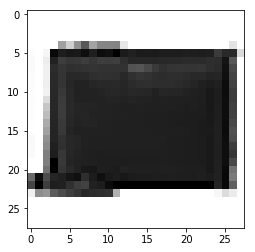

LABEL: 8
INPUT:


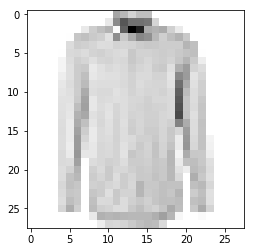

LABEL: 6
INPUT:


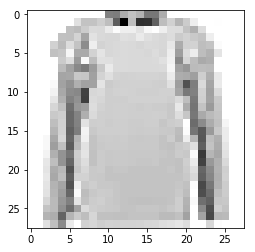

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

clfr = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID)  
grid_search = GridSearchCV(estimator=clfr, param_grid=hl_parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print ('RESULTS FOR NN')

print("\nBest parameters set found: " + str(grid_search.best_params_))

print("\nScore with best parameters: " +str(grid_search.best_score_))

print("\nAll scores on the grid:")

print(pd.DataFrame(grid_search.cv_results_))

Iteration 1, loss = 2.42115582
Iteration 2, loss = 2.26020623
Iteration 3, loss = 2.13146252
Iteration 4, loss = 2.00225310
Iteration 5, loss = 1.98488774
Iteration 6, loss = 1.96120050
Iteration 7, loss = 1.70219684
Iteration 8, loss = 1.55454811
Iteration 9, loss = 1.35605665
Iteration 10, loss = 1.22190567
Iteration 11, loss = 1.15541974
Iteration 12, loss = 1.08911959
Iteration 13, loss = 1.01709469
Iteration 14, loss = 0.98147729
Iteration 15, loss = 0.94505799
Iteration 16, loss = 0.98169692
Iteration 17, loss = 1.06951803
Iteration 18, loss = 1.18863558
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.55190676
Iteration 2, loss = 2.35068006
Iteration 3, loss = 2.22144075
Iteration 4, loss = 2.17664699
Iteration 5, loss = 2.11036845
Iteration 6, loss = 2.06628618
Iteration 7, loss = 1.97318497
Iteration 8, loss = 1.88911946
Iteration 9, loss = 1.83060857
Iteration 10, loss = 1.75114478
Iteration 11, loss = 1.68188953

Iteration 12, loss = 1.42842250
Iteration 13, loss = 1.17237174
Iteration 14, loss = 1.04942442
Iteration 15, loss = 1.01337889
Iteration 16, loss = 1.03749079
Iteration 17, loss = 1.21497569
Iteration 18, loss = 1.04269313
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.33879000
Iteration 2, loss = 3.31911540
Iteration 3, loss = 2.54497168
Iteration 4, loss = 3.04936642
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.32107009
Iteration 2, loss = 3.44213171
Iteration 3, loss = 2.32597543
Iteration 4, loss = 2.33585689
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.32295570
Iteration 2, loss = 2.59380257
Iteration 3, loss = 2.25562235
Iteration 4, loss = 2.25995410
Iteration 5, loss = 2.02956717
Iteration 6, loss = 1.99692423
Iteration 7, loss = 1.87746409
Iteration 8, loss = 1.94314970
Iterati

## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

The higher the size of the NN the higher the score. This is not a thing we have to take for granted, especially because when taking a more complex model we may run into overfitting which is a problem that has to be taken into acount, and of course avoided.
In addition, it's not always true that a NN with a higher number of neurons performs better than another one with less neurons. All we have to do is try and observe the results.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
mlp.fit(X_train,y_train)

training_error = 1. - mlp.score(X_train,y_train)
test_error = 1. - mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.010000
Best NN test error: 0.219412


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 994,  989, 1025, 1008,  975,  998, 1015,  997,  982, 1017],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

#I 'll try some achitectures:
# (5,)
clfier5 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
clfier5.fit(X_train, y_train)
training_error5 = 1. - clfier5.score(X_train,y_train)
test_error5 = 1. - clfier5.score(X_test,y_test)
print('Training error for (5,) architecture: ' + str(training_error5))
print('Test error for (5,) architecture: ' + str(test_error5))

#(6,)
clfier6 = MLPClassifier(hidden_layer_sizes=(6,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
clfier6.fit(X_train, y_train)
training_error6 = 1. - clfier6.score(X_train,y_train)
test_error6 = 1. - clfier6.score(X_test,y_test)
print('\nTraining error for (6,) architecture: ' + str(training_error6))
print('Test error for (6,) architecture: ' + str(test_error6))

#(50,)
clfier50 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
clfier50.fit(X_train, y_train)
training_error50 = 1. - clfier50.score(X_train,y_train)
test_error50 = 1. - clfier50.score(X_test,y_test)
print('\nTraining error for (50,) architecture: ' + str(training_error50))
print('Test error for (50,) architecture: ' + str(test_error50))

#(50,10,5)
clfier50105 = MLPClassifier(hidden_layer_sizes=(50, 10, 5), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)
clfier50105.fit(X_train, y_train)
training_error50105 = 1. - clfier50105.score(X_train,y_train)
test_error50105 = 1. - clfier50105.score(X_test,y_test)
print('\nTraining error for (50, 10, 5) architecture: ' + str(training_error50105))
print('Test error for (50, 10, 5) architecture: ' + str(test_error50105))
print('\n')

clfier = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=300,verbose=True, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)  
grid_search = GridSearchCV(estimator=clfier, param_grid=hl_parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("\nBest parameters set found: " + str(grid_search.best_params_))

print("\nScore with best parameters: " +str(grid_search.best_score_))

print("\nAll scores on the grid:")

print(pd.DataFrame(grid_search.cv_results_))

Training error for (5,) architecture: 0.31000000000000005
Test error for (5,) architecture: 0.32633999999999996

Training error for (6,) architecture: 0.22050000000000003
Test error for (6,) architecture: 0.26434

Training error for (50,) architecture: 0.047900000000000054
Test error for (50,) architecture: 0.14851999999999999

Training error for (50, 10, 5) architecture: 0.16180000000000005
Test error for (50, 10, 5) architecture: 0.19354000000000005


Iteration 1, loss = 1.34096320
Iteration 2, loss = 0.73508788
Iteration 3, loss = 0.63638018
Iteration 4, loss = 0.59819102
Iteration 5, loss = 0.56633336
Iteration 6, loss = 0.54771884
Iteration 7, loss = 0.53337168
Iteration 8, loss = 0.53949763
Iteration 9, loss = 0.51397286
Iteration 10, loss = 0.49720864
Iteration 11, loss = 0.48309961
Iteration 12, loss = 0.49051783
Iteration 13, loss = 0.46985519
Iteration 14, loss = 0.46334169
Iteration 15, loss = 0.46365540
Iteration 16, loss = 0.45474491
Iteration 17, loss = 0.44557891
Iterati

Iteration 17, loss = 0.24521325
Iteration 18, loss = 0.24295049
Iteration 19, loss = 0.24746463
Iteration 20, loss = 0.23054744
Iteration 21, loss = 0.22329974
Iteration 22, loss = 0.21187120
Iteration 23, loss = 0.21537121
Iteration 24, loss = 0.19909655
Iteration 25, loss = 0.19682173
Iteration 26, loss = 0.18850033
Iteration 27, loss = 0.19081008
Iteration 28, loss = 0.17536933
Iteration 29, loss = 0.17286211
Iteration 30, loss = 0.17637798
Iteration 31, loss = 0.16193628
Iteration 32, loss = 0.15835011
Iteration 33, loss = 0.16275164
Iteration 34, loss = 0.15893851
Iteration 35, loss = 0.15335107
Iteration 36, loss = 0.14625596
Iteration 37, loss = 0.14698969
Iteration 38, loss = 0.13279325
Iteration 39, loss = 0.12927284
Iteration 40, loss = 0.12632080
Iteration 41, loss = 0.13696123
Iteration 42, loss = 0.12129299
Iteration 43, loss = 0.13326161
Iteration 44, loss = 0.13989471
Iteration 45, loss = 0.11841456
Iteration 46, loss = 0.11879751
Iteration 47, loss = 0.10232593
Iteratio

Iteration 13, loss = 0.27217908
Iteration 14, loss = 0.24904285
Iteration 15, loss = 0.23417578
Iteration 16, loss = 0.25177522
Iteration 17, loss = 0.22980757
Iteration 18, loss = 0.23632998
Iteration 19, loss = 0.19973042
Iteration 20, loss = 0.19633091
Iteration 21, loss = 0.19822995
Iteration 22, loss = 0.19566430
Iteration 23, loss = 0.19177977
Iteration 24, loss = 0.21240052
Iteration 25, loss = 0.17913965
Iteration 26, loss = 0.16543785
Iteration 27, loss = 0.16771024
Iteration 28, loss = 0.16447999
Iteration 29, loss = 0.14903368
Iteration 30, loss = 0.15814204
Iteration 31, loss = 0.14252380
Iteration 32, loss = 0.16162533
Iteration 33, loss = 0.13783652
Iteration 34, loss = 0.13241291
Iteration 35, loss = 0.13490215
Iteration 36, loss = 0.12936222
Iteration 37, loss = 0.11909172
Iteration 38, loss = 0.12134878
Iteration 39, loss = 0.12484919
Iteration 40, loss = 0.11213927
Iteration 41, loss = 0.10304447
Iteration 42, loss = 0.11424134
Iteration 43, loss = 0.12703277
Iteratio

## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

I tried some borderline architectures (5,), (6,) and (50, 10, 5). Considering the first two I got an improvement in the trainng error despite adding only a neuron. Comparing them to (50,) I observed that the improvement in learning tends to slow down a lot when increasing the number of neurons.
Considering the third architecture instead I got the proof the increasing the number of layer doesn 't neccessarily gives me better results; indeed it behaves worse than the (50,) architecture.
GridSearchCV finds the best architecture to be the one with 50 neurons and two layers. As we can see we loose something in terms of training error, that comes from the fact that we use more data to train the NN, but we benefit in terms of test error since the NN has more data available for his learning task.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV
mlp_more = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID)  
mlp_more.fit(X_train,y_train)

training_error = 1. - mlp_more.score(X_train,y_train)
test_error = 1. - mlp_more.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.068500
Best NN test error: 0.145260


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

The train error results higher when using a larger number of training samples. On the other side the test error improves.
As a matter of fact the architecture do differ. In the second case we have one more layer with 50 neurons doubling the size of the picked NN.

## TO DO 8

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


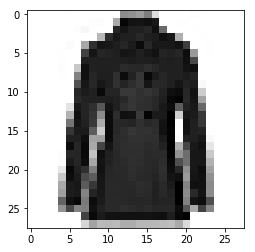

LABEL: 4
NN with m=500 predict:  2
NN with m=1000 predict:  4


In [13]:
Y_predicted_NN500 = mlp.predict(X_test)
Y_predicted_NN1000 = mlp_more.predict(X_test)
for i,x in enumerate(y_test):
    if((Y_predicted_NN500[i] != x) and (Y_predicted_NN1000[i] == x)):
        plot_input(X_test,y_test,i)
        print("NN with m=500 predict: ",Y_predicted_NN500[i])
        print("NN with m=1000 predict: ",Y_predicted_NN1000[i])
        break


Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


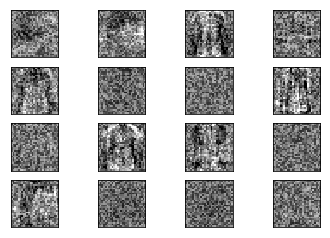

Weights with 10000 data points:


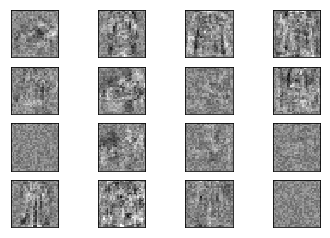

In [14]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_more.coefs_[0].min(), mlp_more.coefs_[0].max()
for coef, ax in zip(mlp_more.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

The lighter the pixel the heavier the weight associated, the darker the opposite. So, if we manage to see something looking like a clothe it means that the corresponding neuron is actually learning the image. On the other side, if the output weight is so noisy that we can't recognize anything, it means that the corresponding neuron is not learning the image, and it's very likely to happen because the NN is not using it.
As we can see the output weights of the NN trained using 10000 datapoints, are sharper than the case where it's trained with less, becaus the NN is learning more and more weights get thus activated.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[I AM GOING TO USE SVM FROM THE PREVIOUS HOMEWORK. I NEED TO SET THE PARAMETERS FOR THE SUPPORT VECTORS AND THE KERNEL]**

In [15]:
#get training and test error for the best SVM model from CV
nfolds = 5
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

# best model rbf
rbf_SVM = SVC(kernel='rbf')
best_SVM = GridSearchCV(rbf_SVM, parameters, cv=nfolds)

# fit the model on the entire training set
best_SVM.fit(X_train, y_train) 

training_error_other = 1. - best_SVM.score(X_train,y_train) 
test_error_other = 1. - best_SVM.score(X_test,y_test)

print ('\nRESULTS FOR OTHER CLASSIFIER\n')

print ("Best NN training error: %f" % training_error_other)
print ("Best NN test error: %f" % test_error_other)


RESULTS FOR OTHER CLASSIFIER

Best NN training error: 0.016200
Best NN test error: 0.124120


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

Comparing the score we get with the best parameters from NN and SVM I observe a lower error on the test when using the SVM, with rbf kernel. I' ll chose as classifier the SVM, with rbf kernel, since it looks to perform better based on his test error than the NN despite it's easy to set up and takes far less time for training.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [16]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [17]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [18]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)
kmeans.fit_predict(X_train)


array([5, 9, 1, ..., 9, 8, 2])

## Comparison of clusters with true labels

## TO DO 2
Now compare the clustered obtained with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [19]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
pred = kmeans.predict(X_test)
sklearn.metrics.cluster.contingency_matrix(y_test, pred)

array([[  21,  169, 3285,   30,  163,    0,  432,    0,    1, 1680],
       [   3, 5204,  230,    0,   65,    0,  123,    0,    0,  156],
       [  29,    8,   99,   22, 3512,    0,  434,    1,    1, 1700],
       [   5, 3046, 1619,   13,   56,    0,  397,    0,    0,  641],
       [  16,  141,  785,   27, 3607,    0,  193,    0,    0, 1039],
       [   4,    1,    2,   10,    0,  485, 3784,  295, 1188,   37],
       [  67,   48, 1020,   16, 1955,    1,  624,    1,    4, 2082],
       [   1,    0,    0,    0,    0,  961,  567,   30, 4245,    0],
       [2234,   18,   22, 2279,  255,  120,  434,    6,  191,  253],
       [   3,    2,    4,    0,    2, 2584,  159, 2927,   84,   42]])

## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

Rows of the matrix represent the actual label while coloumns represent the predicted label. If follows that the ideal case would be having values (equal to the number of data points) just on the main diagonal and 0s everywhere else.
This matrix shows us how the clustering assigned our data points vs their true labels.
I can observe some wrong prediction on the rightmost coloumn which contains several high values not laying on the main diagonl.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [20]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

for i in range(2,16):
    kmeans1 = KMeans(n_clusters=i, n_init=10, random_state=ID)
    pred1 = kmeans1.fit_predict(X_train)
    silhouttescore = sklearn.metrics.silhouette_score(X=X_train,labels=pred1, random_state=ID)
    print("Silhoutte coefficient for number of clusters = "+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters = 2: 0.18975331898476316
Silhoutte coefficient for number of clusters = 3: 0.18449209252140533
Silhoutte coefficient for number of clusters = 4: 0.18268390377411298
Silhoutte coefficient for number of clusters = 5: 0.16572372040155617
Silhoutte coefficient for number of clusters = 6: 0.1589238956540325
Silhoutte coefficient for number of clusters = 7: 0.16495310577551292
Silhoutte coefficient for number of clusters = 8: 0.1561879064013039
Silhoutte coefficient for number of clusters = 9: 0.15542352301064014
Silhoutte coefficient for number of clusters = 10: 0.15211625272056342
Silhoutte coefficient for number of clusters = 11: 0.1457486797343071
Silhoutte coefficient for number of clusters = 12: 0.13911027139263737
Silhoutte coefficient for number of clusters = 13: 0.13590258837895622
Silhoutte coefficient for number of clusters = 14: 0.13039857926010517
Silhoutte coefficient for number of clusters = 15: 0.12640467878313377


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

From theory what we know about the silhouette score for a given k is: the higher, the better. On the other side, one would expect the best number of cluster would be equal to the number of different type of clothes int our dataset. As a matter of fact this is not happening to be our case, in fact I observe the min Silhouette score for k=15, while the max for k=2.
So, based on the result I observe and what I've learnt from theory in class, the choice of k (k=2), doesn' t match my intuition. The reason why might be that the higher k, the more are clusters likely to overlap each other, making me set k in order to obtain the lowest number of overlaps by using the lowest number of clusters.
